## 5.3 SVM회귀

#### SVM을 회귀에 적용하는 방법 : 목표를 반대로 한다! 
- 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류 안에서 도로 안에 가능한 많은 샘플이 들어가도록 학습 
- 도로 폭은 하이퍼파라미터(앱실론)으로 조절) 
  -> 앱실론에 민감하지 않다는 의미 : 마진 안에서 훈련 샘플이 추가되어도 모델의 예측에 영향이 없음 (앱실론-insensitibve)
  

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

##### Linear SVR을 이용한 선형 SVM 회귀 적용 (Linear SVR은 Linear SVC 의 회귀 버전)
  - LinearSVR은 필요한 시간이 훈련 세트의 크기에 비례하여 선형적으로 증가 
  - SVR은 훈련 세트가 커지면 훨씬 느려짐 



In [5]:
from sklearn.svm import LinearSVR 

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

##### 사이킷런의 SVR을 사용하여 규제가 적은 모델 만들기 
(SVR은 SVC의 회귀 버전) 

In [12]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = 'poly', degree=2, C=100, epsilon=0.1) 
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
svm_reg

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

이 밑은 그래프를 그려보고자 만든 샘플 코드 입니다. 교재와는 상관 없습니다.. 

No handles with labels found to put in legend.


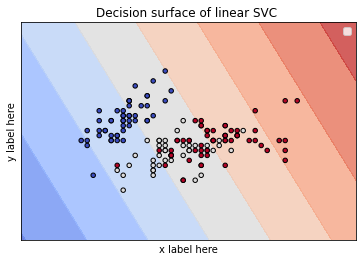

In [8]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

svm_reg = LinearSVR(epsilon=1.5)
clf = svm_reg.fit(X, y)
#model = svm.SVC(kernel='linear')
#clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


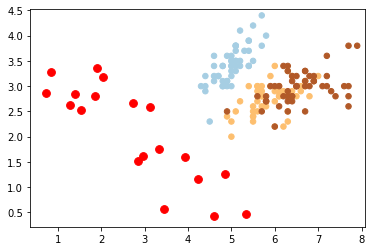

In [10]:
# 샘플 데이터 표현
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# 지지벡터(Support Vector) 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()